In [1]:
import pandas as pd
import numpy as np
import tweepy as tw
import re
import spacy
import itertools
import collections
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
api_key = 'XXX'
api_secret_key = 'XXX'
bearer_token =  'XXX'

In [3]:
auth = tw.OAuthHandler(api_key, api_secret_key)
#auth = tw.AppAuthHandler(api_key, api_secret_key)
#auth.set_access_token(api_key, api_secret_key)
api = tw.API(auth, wait_on_rate_limit=True)

# Data acquisition

In [6]:
parties = ['__Lewica', 'pisorgpl', 'Platforma_org', 'KONFEDERACJA_', 'nowePSL', 'PL_2050']

In [7]:
userID='__Lewica'
tweets = api.user_timeline(screen_name=userID, 
                           # 200 is the maximum allowed count
                           count=20,
                           include_rts = False,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )

In [8]:
userID='pisorgpl'
tweets = api.user_timeline(screen_name=userID, 
                           # 200 is the maximum allowed count
                           count=20,
                           include_rts = False,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )
all_tweets = [tweet.full_text for tweet in tweets]

In [9]:
all_tweets[:5]

['🗨️ Prezes #PiS, Wicepremier J. #Kaczyński dla @Int_Wydarzenia: Chcemy kontynuować politykę prospołeczną, która jednak zawsze musi być wsparta tym, co służy rozwojowi gospodarczemu. #PolskiŁad 🇵🇱 https://t.co/ZKTLXr69hp',
 '🗨️ Prezes #PiS, Wicepremier J. #Kaczyński dla @Int_Wydarzenia: Cel jest jasny: na początku dziesięciolecia zrównać się z europejskim poziomem życia. #PolskiŁad 🇵🇱 https://t.co/xolAh92dRC',
 'Politycy #PiS jutro (21.05) w mediach:\n07:05 @PolskieRadio24 - @radekfogiel \n08:06 @PolskieRadio24 - @MariaKoc1 \n08:10 @tvp_info - @FilipKaczynski \n08:30 @wirtualnapolska - @PiotrMuller https://t.co/apIm0pv3vY',
 '🗨️ Prezes #PiS, Wicepremier J. #Kaczyński dla @Int_Wydarzenia o reformie podatkowej w #PolskiŁad.🇵🇱 https://t.co/jxKBCbShY6',
 '👥 💬 Zapraszamy na debatę z udziałem Ministra @MZ_GOV_PL @a_niedzielski: #PolskiŁad sposobem na odbudowę zdrowia Polaków po #COVID19. #7procNaZdrowie\n\n🕙 Piątek (21 maja) o godz. 10:00.\n🎥 Transmisja 👉 https://t.co/BnzUMvonXG. https://t.c

In [10]:
for info in tweets[:3]:
     print("ID: {}".format(info.id))
     print(info.created_at)
     print(info.full_text)
     print("\n")

ID: 1395467722239119366
2021-05-20 19:53:26
🗨️ Prezes #PiS, Wicepremier J. #Kaczyński dla @Int_Wydarzenia: Chcemy kontynuować politykę prospołeczną, która jednak zawsze musi być wsparta tym, co służy rozwojowi gospodarczemu. #PolskiŁad 🇵🇱 https://t.co/ZKTLXr69hp


ID: 1395458553415147523
2021-05-20 19:17:00
🗨️ Prezes #PiS, Wicepremier J. #Kaczyński dla @Int_Wydarzenia: Cel jest jasny: na początku dziesięciolecia zrównać się z europejskim poziomem życia. #PolskiŁad 🇵🇱 https://t.co/xolAh92dRC


ID: 1395443648083513344
2021-05-20 18:17:46
Politycy #PiS jutro (21.05) w mediach:
07:05 @PolskieRadio24 - @radekfogiel 
08:06 @PolskieRadio24 - @MariaKoc1 
08:10 @tvp_info - @FilipKaczynski 
08:30 @wirtualnapolska - @PiotrMuller https://t.co/apIm0pv3vY




In [11]:
# extract all tweets
all_tweets = []
all_tweets.extend(tweets)
oldest_id = tweets[-1].id
while True:
    tweets = api.user_timeline(screen_name=userID, 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           max_id = oldest_id - 1,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )
    if len(tweets) == 0:
        break
    oldest_id = tweets[-1].id
    all_tweets.extend(tweets)
    print('N of tweets downloaded till now {}'.format(len(all_tweets)))

N of tweets downloaded till now 162
N of tweets downloaded till now 299
N of tweets downloaded till now 441
N of tweets downloaded till now 588
N of tweets downloaded till now 728
N of tweets downloaded till now 871
N of tweets downloaded till now 1011
N of tweets downloaded till now 1156
N of tweets downloaded till now 1306
N of tweets downloaded till now 1451
N of tweets downloaded till now 1599
N of tweets downloaded till now 1745
N of tweets downloaded till now 1880
N of tweets downloaded till now 2029
N of tweets downloaded till now 2160
N of tweets downloaded till now 2287
N of tweets downloaded till now 2310


In [12]:
outtweets = [[tweet.user.name, 
              tweet.id_str, 
              tweet.created_at, 
              tweet.favorite_count, 
              tweet.retweet_count, 
              tweet.full_text.encode("utf-8").decode("utf-8")] 
             for idx,tweet in enumerate(all_tweets)]
df = pd.DataFrame(outtweets,columns=["name", "id","created_at","favorite_count","retweet_count", "text"])
df.to_csv('%s_tweets.csv' % userID,index=False)
df.head(3)

,name,id,created_at,favorite_count,retweet_count,text
0,Prawo i Sprawiedliwość,1395467722239119366,2021-05-20 19:53:26,100,36,"🗨️ Prezes #PiS, Wicepremier J. #Kaczyński dla ..."
1,Prawo i Sprawiedliwość,1395458553415147523,2021-05-20 19:17:00,160,54,"🗨️ Prezes #PiS, Wicepremier J. #Kaczyński dla ..."
2,Prawo i Sprawiedliwość,1395443648083513344,2021-05-20 18:17:46,20,6,Politycy #PiS jutro (21.05) w mediach:\n07:05 ...


In [13]:
def get_raw_tweets(parties=parties):
    "This function creates a df with raw tweets, they need to be processed later"
    
    df = pd.DataFrame(columns=["name", "id","created_at","favorite_count","retweet_count", "text"])
    for party in parties:
        all_tweets = []
        print(f'Now downloading tweets of {party}')
        tweets = api.user_timeline(screen_name=party, 
                               # 200 is the maximum allowed count
                               count=200,
                               include_rts = False,
                               tweet_mode = 'extended'
                               )
        all_tweets.extend(tweets)
        oldest_id = tweets[-1].id
        while True:
            tweets = api.user_timeline(screen_name=party, 
                                   # 200 is the maximum allowed count
                                   count=200,
                                   include_rts = False,
                                   max_id = oldest_id - 1,
                                   # Necessary to keep full_text 
                                   # otherwise only the first 140 words are extracted
                                   tweet_mode = 'extended'
                                   )
            if len(tweets) == 0:
                break
            oldest_id = tweets[-1].id
            all_tweets.extend(tweets)
            print('N of tweets of downloaded till now {}'.format(len(all_tweets)))
            
        outtweets = [[tweet.user.name, 
              tweet.id_str, 
              tweet.created_at, 
              tweet.favorite_count, 
              tweet.retweet_count, 
              tweet.full_text.encode("utf-8").decode("utf-8")] for idx,tweet in enumerate(all_tweets)]

        df_temp = pd.DataFrame(outtweets, columns=["name", "id","created_at","favorite_count","retweet_count", "text"])
        df = df.append(df_temp)
    return df

In [14]:
df_raw = get_raw_tweets()

Now downloading tweets of __Lewica
N of tweets of downloaded till now 98
N of tweets of downloaded till now 158
N of tweets of downloaded till now 221
N of tweets of downloaded till now 261
N of tweets of downloaded till now 309
N of tweets of downloaded till now 351
N of tweets of downloaded till now 402
N of tweets of downloaded till now 451
N of tweets of downloaded till now 519
N of tweets of downloaded till now 553
N of tweets of downloaded till now 612
N of tweets of downloaded till now 669
N of tweets of downloaded till now 715
N of tweets of downloaded till now 759
N of tweets of downloaded till now 809
N of tweets of downloaded till now 841
Now downloading tweets of pisorgpl
N of tweets of downloaded till now 284
N of tweets of downloaded till now 430
N of tweets of downloaded till now 578
N of tweets of downloaded till now 718
N of tweets of downloaded till now 858
N of tweets of downloaded till now 997
N of tweets of downloaded till now 1145
N of tweets of downloaded till no

In [384]:
df_raw.head()

,name,id,created_at,favorite_count,retweet_count,text
0,Lewica,1392140219600850945,2021-05-11 15:31:07,6,1,#LewicawMediach: @WojciechKoniec4 dziś o 20:13...
1,Lewica,1392129219820494850,2021-05-11 14:47:25,6,1,#LewicawMediach: Marek #Dyduch dziś o 20:20 w ...
2,Lewica,1392118366056456193,2021-05-11 14:04:17,12,2,#LewicawMediach: @RobertBiedron dziś o 20:00 w...
3,Lewica,1392029199578370049,2021-05-11 08:09:58,15,3,#LewicawMediach: @K_Smiszek dziś o 13:00 w #On...
4,Lewica,1391798276043776003,2021-05-10 16:52:22,33,2,#LewicawMediach: @RobertBiedron jutro o 9:30 w...


In [385]:
df_raw.to_csv('%s_tweets.csv' % userID,index=False)

## Cleaning the data

In [386]:
nlp = spacy.load("pl_core_news_sm")
all_stopwords = nlp.Defaults.stop_words # how to load stopwords

In [387]:
all_tweets = df_raw['text']

In [388]:
def remove_url(txt):
    return " ".join(re.sub(r'https?:\/\/.*[\r\n]*',"",txt).split())

In [391]:
#all_tweets_no_urls = [remove_url(tweet.full_text) for tweet in all_tweets]
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:10]

['#LewicawMediach: @WojciechKoniec4 dziś o 20:13 w #Minęła20 @tvp_info',
 '#LewicawMediach: Marek #Dyduch dziś o 20:20 w #DebataDnia @PolsatNewsPL',
 '#LewicawMediach: @RobertBiedron dziś o 20:00 w @KropkaNadI w @tvn24',
 '#LewicawMediach: @K_Smiszek dziś o 13:00 w #OnetOpinie @onetpl',
 '#LewicawMediach: @RobertBiedron jutro o 9:30 w #ExpressBiedrzyckiej @se_pl',
 '#LewicawMediach: @KUeberhan jutro o godz. 8:18 w #Minęła8 @tvp_info',
 '#LewicawMediach: Wiesław @Szczepanski2019 jutro o 7:35 na antenie @PolskieRadio24',
 'Mija 10 lat od uchwalenia Konwencji Stambulskiej. Z inicjatywy @GabrielaMorStan w @PolskiSenat odbyła się dyskusja o tym ważnym dokumencie. Rząd, zamiast walczyć z przemocą i działać na rzecz jej ofiar rozważa wypowiedzenie Konwencji Stambulskiej! #Lewica #KonwencjaStambulska',
 '10 maja 2020r. nie odbyły się wybory prezydenckie, które kosztowały budżet państwa 133 mln zł! Przypominamy, że Lewica złożyła w tej sprawie zawiadomienie do Prokuratury Regionalnej w Warszawi

In [392]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]

In [393]:
# delete stopwords
tweets_nsw = [[word for word in tweet if not word in all_stopwords] for tweet in words_in_tweet]

In [400]:
# Delete tags
regex = re.compile(r'.*@')
tweets_nsw = [[i for i in tweet if not regex.match(i)] for tweet in tweets_nsw]

# only words composed of letters
regex = re.compile(r'^[a-z]+$')
tweets_nsw = [[i for i in tweet if regex.match(i)] for tweet in tqdm(tweets_nsw)]

100%|████████████████████████████████████████████████████████████████████████| 10029/10029 [00:00<00:00, 147771.12it/s]


In [ ]:
# Lemmatization
# doc = nlp(" ".join(tweets_nsw[0]))
# [token.lemma_ for token in doc if not token.is_punct]
tweets_lemma = [[token.lemma_ for token in nlp(" ".join(tweet)) if not token.is_punct] for tweet in tqdm(tweets_nsw)]
# it deletes also hashtags which might be problematic
tweets_lemma[:5]

## Summary - word count

In [ ]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*tweets_lemma))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(200)[:5]

In [292]:
# clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
#                              columns=['words', 'count'])
# clean_tweets_ncw.head()

In [452]:
words_common = pd.DataFrame(columns=['words', 'count', 'name'])

for party in df['name'].unique():
    all_words_no_urls = list(itertools.chain(*[tweet.split() for tweet in df[df['name']==party]['text_clear']]))
    counts_no_urls = collections.Counter(all_words_no_urls)
    clean_temp = pd.DataFrame(counts_no_urls.most_common(200), columns=['words', 'count'])
    clean_temp['name'] = party
    words_common = words_common.append(clean_temp)

## Summary - main dataframe

#### Data preparation

In [458]:
df = df_raw.copy()
df['text_clear'] = [' '.join(tweet) for tweet in tweets_lemma]

In [459]:
def count_points(tweets, dictionary):
    """This is a function which takes a list of tweets in a df column (each word after a space)
    and returns a score for tweet in a given category"""
    score = []
    for tweet in tweets:
        i = 0
        for word in dictionary:
            i = i + tweet.split().count(word)
        #print(tweet)
        #print(i)
        score.append(i)
    return score

In [473]:
# vocabulary
economy = ['gospodarka', 'inwestycja', 'pieniądz', 'mieszkanie', 'zawodowy', 'rolnictwo', 'praca', 'bezrobocie', 'przemysł', 'emerytura', 'płaca']
health = ['szpital', 'pandemia', 'zdrowie', 'szczepienie', 'maseczka']
justice = ['sąd', 'trybunał', 'sprawiedliwość', 'konstytucja']
social = ['lgbtq', 'kościół', 'aborcja', 'religia', 'lgbt', 'geje', 'kobieta', 'stambulska']

vocab = dict({'economy': economy, 
              'health': health,
             'justice': justice,
             'social': social})

In [474]:
def calculate_scores(dataframe=df, dimensions=list(vocab.keys())):
    """This function adds scores in each category in the dataframe"""
    for dimension in dimensions:
        dataframe[dimension + '_score'] = count_points(dataframe['text_clear'], vocab[dimension])

In [475]:
calculate_scores()
df.head()

,name,id,created_at,favorite_count,retweet_count,text,text_clear,economy_score,health_score,justice_score,social_score,word_count
0,Lewica,1392140219600850945,2021-05-11 15:31:07,6,1,#LewicawMediach: @WojciechKoniec4 dziś o 20:13...,,0,0,0,0,0
1,Lewica,1392129219820494850,2021-05-11 14:47:25,6,1,#LewicawMediach: Marek #Dyduch dziś o 20:20 w ...,marka,0,0,0,0,1
2,Lewica,1392118366056456193,2021-05-11 14:04:17,12,2,#LewicawMediach: @RobertBiedron dziś o 20:00 w...,,0,0,0,0,0
3,Lewica,1392029199578370049,2021-05-11 08:09:58,15,3,#LewicawMediach: @K_Smiszek dziś o 13:00 w #On...,,0,0,0,0,0
4,Lewica,1391798276043776003,2021-05-10 16:52:22,33,2,#LewicawMediach: @RobertBiedron jutro o 9:30 w...,jutro,0,0,0,0,1


In [476]:
df['word_count'] = df['text_clear'].apply(lambda x: len(x.split()))

In [477]:
# regex cheatsheet
# abc…	Letters
# 123…	Digits
# \d	Any Digit
# \D	Any Non-digit character
# .	Any Character
# \.	Period
# [abc]	Only a, b, or c
# [^abc]	Not a, b, nor c
# [a-z]	Characters a to z
# [0-9]	Numbers 0 to 9
# \w	Any Alphanumeric character
# \W	Any Non-alphanumeric character
# {m}	m Repetitions
# {m,n}	m to n Repetitions
# *	Zero or more repetitions
# +	One or more repetitions
# ?	Optional character
# \s	Any Whitespace
# \S	Any Non-whitespace character
# ^…$	Starts and ends
# (…)	Capture Group
# (a(bc))	Capture Sub-group
# (.*)	Capture all
# (abc|def)	Matches abc or def

### Summary

In [571]:
score_summary = df.pivot_table(index='name', values=['economy_score', 'health_score', 'justice_score', 'social_score', 'word_count'], aggfunc='sum')

In [572]:
cols = score_summary.columns[:-1]; cols
for col in cols:
    score_summary[col] = score_summary[col]*100/score_summary['word_count']
    # values in percent
score_summary
cols_d = ['Economy', 'Health', 'Justice', 'Identity']
dict_cols = {col : col_d for col, col_d in zip(cols, cols_d)}
dict_cols

{'economy_score': 'Economy',
 'health_score': 'Health',
 'justice_score': 'Justice',
 'social_score': 'Identity'}

# Visualization

C:\Users\bartd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bartd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127808 missing from current font.
  font.set_text(s, 0, flags=flags)


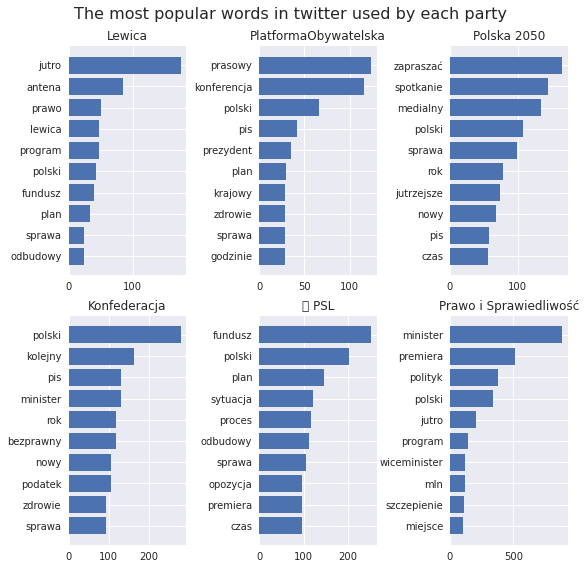

In [563]:
with plt.style.context('seaborn'):
    fig, axs = plt.subplots(2, 3, figsize=(8,8))
    for i, party in enumerate(count.name.unique()):
        temp = 231+i  # this is to index the position of the subplot
        ax=plt.subplot(231+i) #subplots chart starts at 1
        ax.barh(count[count['name']==party]['words'], count[count['name']==party]['count'])
        ax.set_title(f'{party}')
        #ax.set_frame_on(False)
        #plt.subplots_adjust(hspace = .5,wspace=.001)
    fig.suptitle('The most popular words in twitter used by each party', fontsize=16)
    plt.tight_layout()

C:\Users\bartd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bartd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127808 missing from current font.
  font.set_text(s, 0, flags=flags)


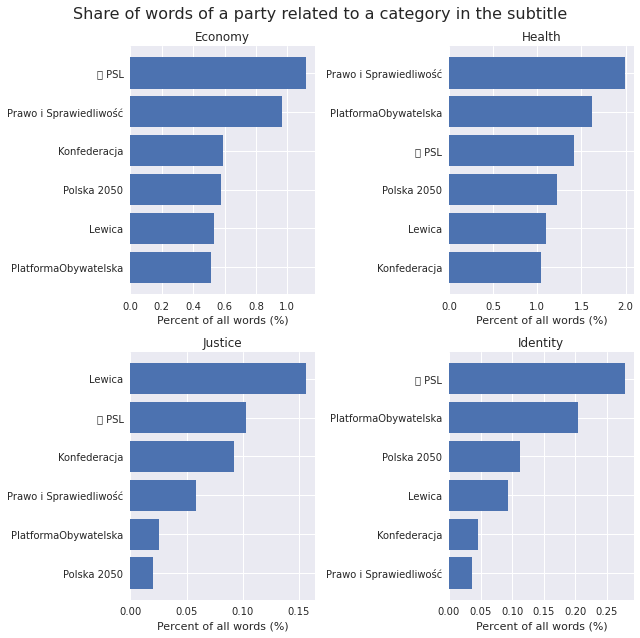

In [579]:
with plt.style.context('seaborn'):
    fig, axs = plt.subplots(2, 2, figsize=(9,9))
    for i, col in enumerate(score_summary.columns[:-1]):
        score_summary.sort_values(col, inplace=True)
        ax=plt.subplot(221+i) #subplots chart starts at 1
        ax.barh(score_summary.index, score_summary[col])
        ax.set_title(f'{dict_cols[col]}')
        ax.set_xlabel('Percent of all words (%)')
        #ax.set_frame_on(False)
        #plt.subplots_adjust(hspace = .5,wspace=.001)
    fig.suptitle('Share of words of a party related to a category in the subtitle', fontsize=16)
plt.tight_layout()